In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)

### <b>Goal #1:</b> Your employer, a privately owned used car sales company, wants to optimize inventory and pricing strategies. They want to use in-house and  out-house data to build models that can accurately predict prices and  quantifies the impact of relevant variables on the price.
 
### <b>Goal #2:</b> This will be the first modeling project of many so keep proper documentation for future reference. This data is in-house data that your boss wants to use as a test run. The employer is also developing a team of senior data scientists to collect and store more data that we should be able to use for modeling. 

### <b>Goal #3:</b> Additionally, the stakeholders have requested a dashboard that can display information that may be useful in making future purchases. 

In [104]:
cwd = os.getcwd()
data_import = pd.read_csv(cwd + "\Car_Price_Pred.csv")
data_import.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [105]:
raw_data = data_import.copy()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [106]:
numeric_df = raw_data.select_dtypes(include=['int', 'float']).copy()

print(numeric_df.shape)


numeric_df

(205, 16)


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [107]:
numeric_df.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [108]:
numeric_df = numeric_df[['price','carlength', 'carwidth', 'carheight', 'curbweight', 
                         'enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 
                         'peakrpm', 'citympg', 'highwaympg', 'wheelbase', 'car_ID']].copy()

In [109]:
corr_mat = numeric_df.corr()
corr_mat

,price,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,wheelbase,car_ID
price,1.000000,0.682920,0.759325,0.119336,0.835305,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599,0.577816,-0.109093
carlength,0.682920,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.874587,0.170636
carwidth,0.759325,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.795144,0.052387
carheight,0.119336,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.589435,0.255960
curbweight,0.835305,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.776386,0.071962
enginesize,0.874145,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.569329,-0.033930
boreratio,0.553173,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.488750,0.260064
stroke,0.079443,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.160959,-0.160824
compressionratio,0.067984,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.249786,0.150276
horsepower,0.808139,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.353294,-0.015006


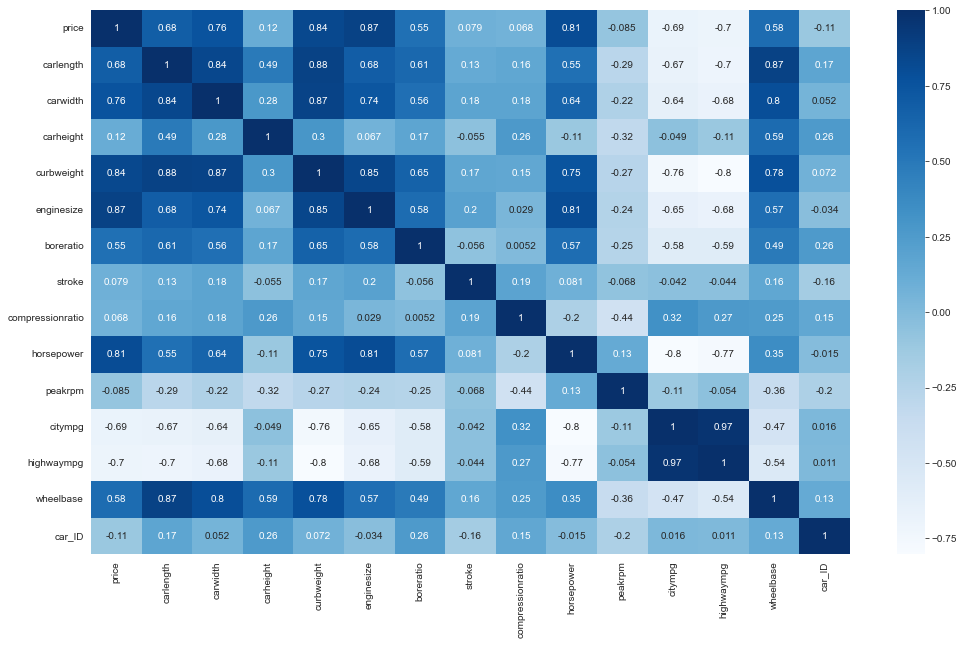

In [110]:
fig, ax = plt.subplots(figsize=(17,10))
sns.heatmap(corr_mat, cmap="Blues", annot=True)
plt.show()

# Visualize Target Variable

In [111]:
def plot_func1(df):
    fig, ax = plt.subplots(figsize=(15,8))
    sns.histplot(df, x='price')
    plt.show()

    fig, ax = plt.subplots(figsize=(15.5,8))
    sns.boxplot(data=df, x='price')
    plt.show()

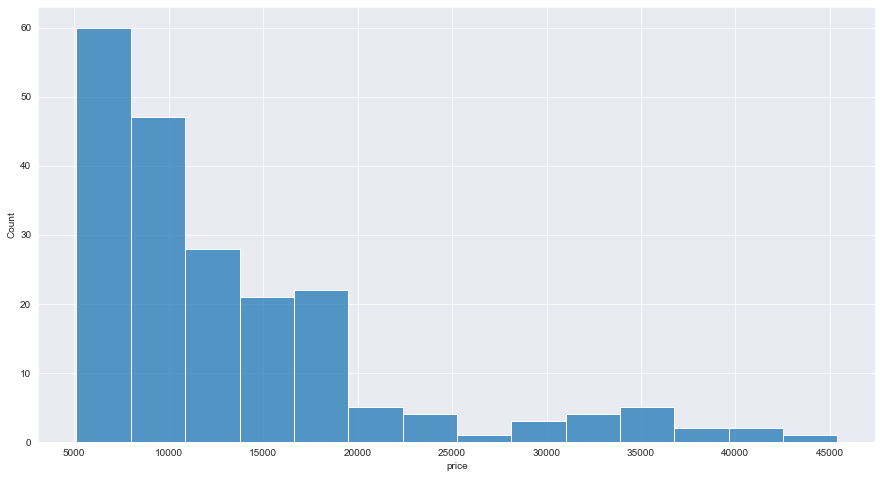

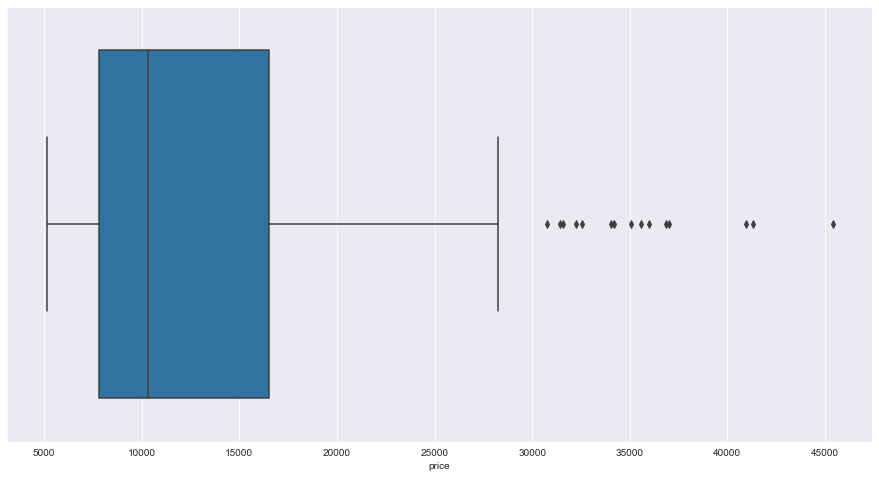

In [112]:
plot_func1(numeric_df)

#### Inspect the outliers for the Target Variable
* We have 15 records with prices much higher than the average of the sample; These records will be dropped.

In [113]:
numeric_df[numeric_df['price'] > 30000]

,price,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,wheelbase,car_ID
15,30760.0,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182,5400,16,22,103.5,16
16,41315.0,193.8,67.9,53.7,3380,209,3.62,3.39,8.0,182,5400,16,22,103.5,17
17,36880.0,197.0,70.9,56.3,3505,209,3.62,3.39,8.0,182,5400,15,20,110.0,18
47,32250.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176,4750,15,19,113.0,48
48,35550.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176,4750,15,19,113.0,49
49,36000.0,191.7,70.6,47.8,3950,326,3.54,2.76,11.5,262,5000,13,17,102.0,50
70,31600.0,202.6,71.7,56.3,3770,183,3.58,3.64,21.5,123,4350,22,25,115.6,71
71,34184.0,202.6,71.7,56.5,3740,234,3.46,3.10,8.3,155,4750,16,18,115.6,72
72,35056.0,180.3,70.5,50.8,3685,234,3.46,3.10,8.3,155,4750,16,18,96.6,73
73,40960.0,208.1,71.7,56.7,3900,308,3.80,3.35,8.0,184,4500,14,16,120.9,74


In [114]:
data = numeric_df[numeric_df['price'] < 25000].copy()

#### Re-evaluate Correlation Coefficients

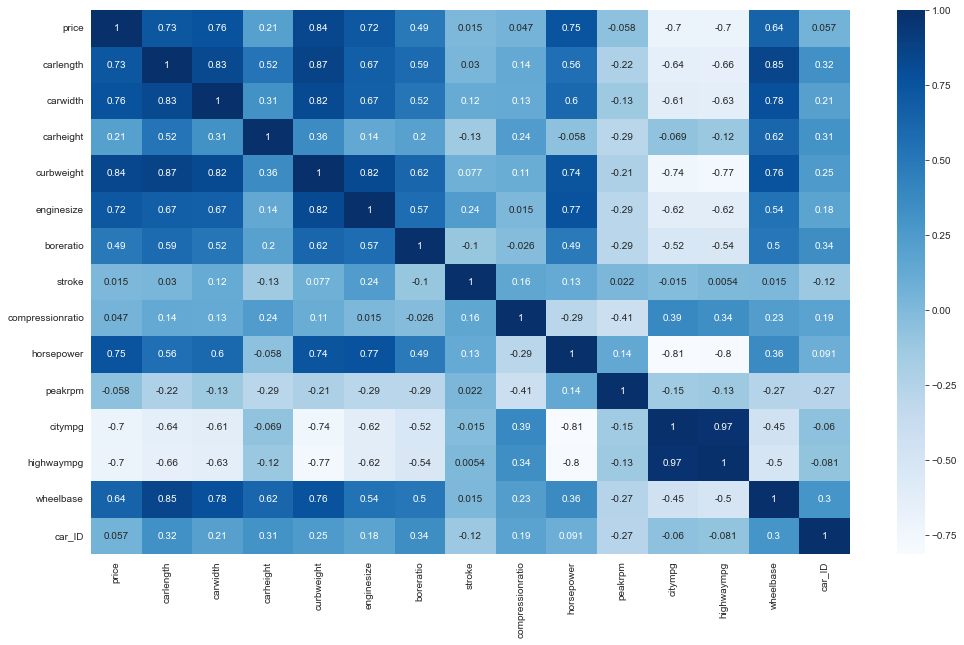

In [115]:
fig, ax = plt.subplots(figsize=(17,10))
corr_mat = data.corr()
sns.heatmap(corr_mat, cmap="Blues", annot=True)
plt.show()

### Linear Regression Model #1
* Predictor Variable: Curbweight
* Response Variable: City MPG

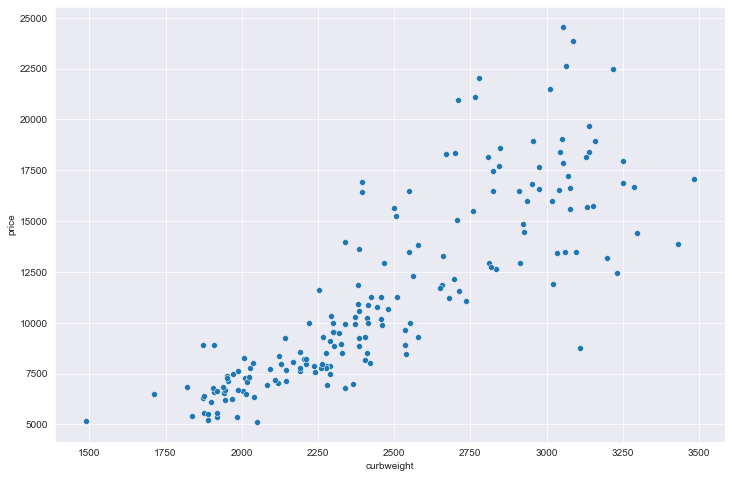

In [116]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=data, x='curbweight', y='price')

plt.show()

In [117]:
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

model1 = sm.ols('price ~ curbweight', data=data).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     434.4
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           1.99e-50
Time:                        22:03:06   Log-Likelihood:                -1728.1
No. Observations:                 187   AIC:                             3460.
Df Residuals:                     185   BIC:                             3467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.089e+04   1078.175    -10.099      0.0

### Variable Inflation Factor

In [212]:
import statsmodels.api as sm2

X = data['curbweight']

# First, create a design matrix with your predictor variables
X_const = sm2.add_constant(X)

# Next, calculate the VIF for each predictor variable
vif = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Finally, attach the VIF values to the predictor variables and inspect the results
vif_df = pd.DataFrame({'variable': X_const.columns, 'VIF': vif})
print(vif_df)

     variable       VIF
0       const 34.539210
1  curbweight  1.000000


c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Assumptions of Linearity
### Residual Plot

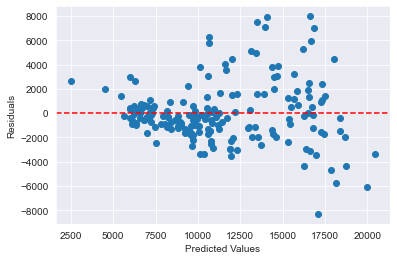

In [119]:
residuals = model1.resid
predicted_values = model1.predict(X)


plt.scatter(predicted_values, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="red", linestyle="--")
plt.show()

### QQ Residual Plots

c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


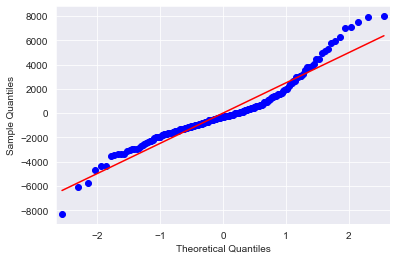

In [120]:
fig, ax = plt.subplots()
sm2.graphics.qqplot(residuals, line='s', ax=ax)
plt.show()

### Linear Regression Model #2
* Predictor Variables: Curbweight, carheight
* Target Variable: Price

In [121]:
model1 = sm.ols('price ~ curbweight + carheight', data=data).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     225.8
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           2.99e-50
Time:                        22:03:06   Log-Likelihood:                -1725.2
No. Observations:                 187   AIC:                             3456.
Df Residuals:                     184   BIC:                             3466.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1396.2650   4079.105     -0.342      0.7

### Linear Regression Model #3
* Predictor Variables: Curbweight, carheight, plus categorical variables
* Target Variable: Price

In [122]:
cat_data = raw_data[['car_ID','fueltype', 'aspiration', 'doornumber', 'carbody', 
                     'drivewheel', 'enginelocation', 'enginetype', 
                     'cylindernumber', 'fuelsystem']].copy()


cat_data.head()

,car_ID,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,2,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,3,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,4,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,5,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [125]:
numeric_df2 = numeric_df

data2 = pd.merge(numeric_df2, cat_data, on='car_ID').copy()
data2.head()

,price,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,wheelbase,car_ID,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,13495.0,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,88.6,1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,16500.0,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,88.6,2,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,16500.0,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,94.5,3,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,13950.0,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,99.8,4,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,17450.0,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,99.4,5,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [127]:
full_df = pd.get_dummies(data2)

full_df.head()

,price,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,wheelbase,car_ID,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,13495.0,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,88.6,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,16500.0,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,88.6,2,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,16500.0,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,94.5,3,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,13950.0,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,99.8,4,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,17450.0,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,99.4,5,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [132]:
full_df.columns

Index(['price', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'wheelbase', 'car_ID',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi

#### Model #3

In [200]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
#pd.options.display.max_rows = 999
#pd.options.display.max_columns = 999

In [207]:

model3 = sm.ols("""price ~ curbweight + carlength + carwidth + carheight + curbweight + enginesize + boreratio + stroke +
                     compressionratio + horsepower + peakrpm + citympg + highwaympg + wheelbase + C(fueltype_diesel) + C(fueltype_gas) +
                     C(aspiration_std) + C(aspiration_turbo) + C(doornumber_four) + C(doornumber_two) + C(carbody_convertible) + C(carbody_hardtop) + C(carbody_hatchback) +
                     C(carbody_sedan) + C(carbody_wagon) + C(drivewheel_4wd) + C(drivewheel_fwd) + C(drivewheel_rwd) + C(enginelocation_front) + C(enginelocation_rear) + 
                     C(enginetype_dohc) + C(enginetype_dohcv) + C(enginetype_l) + C(enginetype_ohc) + C(enginetype_ohcf) + C(enginetype_ohcv) + C(enginetype_rotor) + C(cylindernumber_eight) +
                     C(cylindernumber_five) + C(cylindernumber_four) + C(cylindernumber_six) + C(cylindernumber_three) + C(cylindernumber_twelve) + C(cylindernumber_two) + 
                     C(fuelsystem_1bbl) + C(fuelsystem_2bbl) + C(fuelsystem_4bbl) + C(fuelsystem_idi) + C(fuelsystem_mfi) + C(fuelsystem_mpfi) + C(fuelsystem_spdi) + C(fuelsystem_spfi) """, data=full_df).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     63.68
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           6.33e-81
Time:                        19:01:28   Log-Likelihood:                -1844.9
No. Observations:                 205   AIC:                             3772.
Df Residuals:                     164   BIC:                             3908.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -8487.9741   3697.040     -2.296      0.023   -1.58e+04   -1188.040
C(fueltype_diesel)[T.1]         876.6917   2869.806      0.305      0.760   -4789.840    6543.223
C(fueltype_gas)[T.1]          -9364.6658   2739.832     -3.418      0.001   -1.48e+04   -3954.773
C(aspiration_std)[T.1]        -5068.9520   1940.653     -2.612      0.010   -8900.839   -1237.065
C(aspiration_turbo)[T.1]      -3419.0221   1858.747     -1.839      0.068   -7089.183     251.139
C(doornumber_four)[T.1]       -4373.3567   1887.657     -2.317      0.022   -8100.601    -646.112
C(doornumber_two)[T.1]        -4114.6174   1847.961     -2.227      0.027   -7763.481    -465.754
C(carbody_convertible)[T.1]     704.6278   1056.543      0.667      0.506   -1381.553    2790.808
C(carbody_hardtop)[T.1]       -2527.0557   1110.825     -2.275      0.024   -4720.419    -333.693
C(carbody_hatchback)[T.1]     -2594.6917    906.405     -2.863      0.005   -4384.419    -804.964
C(carbody_sedan)[T.1]         -1477.6443    950.260     -1.555      0.122   -3353.965     398.676
C(carbody_wagon)[T.1]         -2593.2102   1081.935     -2.397      0.018   -4729.529    -456.891
C(drivewheel_4wd)[T.1]        -3176.7492   1305.875     -2.433      0.016   -5755.245    -598.254
C(drivewheel_fwd)[T.1]        -3115.2806   1410.296     -2.209      0.029   -5899.959    -330.602
C(drivewheel_rwd)[T.1]        -2195.9442   1361.272     -1.613      0.109   -4883.823     491.935
C(enginelocation_front)[T.1]  -8044.0337   2062.458     -3.900      0.000   -1.21e+04   -3971.640
C(enginelocation_rear)[T.1]    -443.9404   2393.808     -0.185      0.853   -5170.596    4282.715
C(enginetype_dohc)[T.1]        -149.8081   1151.108     -0.130      0.897   -2422.710    2123.094
C(enginetype_dohcv)[T.1]      -7592.8924   3972.367     -1.911      0.058   -1.54e+04     250.684
C(enginetype_l)[T.1]          -1071.9707   1597.020     -0.671      0.503   -4225.343    2081.401
C(enginetype_ohc)[T.1]         2957.3212   1109.924      2.664      0.008     765.739    5148.904
C(enginetype_ohcf)[T.1]        1068.8289   1349.600      0.792      0.430   -1596.002    3733.660
C(enginetype_ohcv)[T.1]       -5834.3735   1121.276     -5.203      0.000   -8048.371   -3620.376
C(enginetype_rotor)[T.1]       2134.9205   1384.170      1.542      0.125    -598.172    4868.013
C(cylindernumber_eight)[T.1]   4389.4448   2169.718      2.023      0.045     105.262    8673.628
C(cylindernumber_five)[T.1]   -4883.5564   1590.318     -3.071      0.002   -8023.695   -1743.418
C(cylindernumber_four)[T.1]   -5478.2373   1551.780     -3.530      0.001   -8542.280   -2414.194
C(cylindernumber_six)[T.1]    -2216.5619    921.121     -2.406      0.017   -4035.347    -397.777
C(cylindernumber_three)[T.1]   3872.5820   29

In [205]:
pd.options.display.float_format = '{:2f}'.format

model3.pvalues

Intercept                       0.022949
C(fueltype_diesel)[T.1]         0.760382
C(fueltype_gas)[T.1]            0.000796
C(aspiration_std)[T.1]          0.009838
C(aspiration_turbo)[T.1]        0.067661
C(doornumber_four)[T.1]         0.021750
C(doornumber_two)[T.1]          0.027338
C(carbody_convertible)[T.1]     0.505762
C(carbody_hardtop)[T.1]         0.024205
C(carbody_hatchback)[T.1]       0.004750
C(carbody_sedan)[T.1]           0.121876
C(carbody_wagon)[T.1]           0.017663
C(drivewheel_4wd)[T.1]          0.016063
C(drivewheel_fwd)[T.1]          0.028564
C(drivewheel_rwd)[T.1]          0.108633
C(enginelocation_front)[T.1]    0.000140
C(enginelocation_rear)[T.1]     0.853102
C(enginetype_dohc)[T.1]         0.896613
C(enginetype_dohcv)[T.1]        0.057694
C(enginetype_l)[T.1]            0.503017
C(enginetype_ohc)[T.1]          0.008482
C(enginetype_ohcf)[T.1]         0.429528
C(enginetype_ohcv)[T.1]         0.000001
C(enginetype_rotor)[T.1]        0.124908
C(cylindernumber

## Model #4
* Fine Tune Model #3
* Some of the variables have a p-value > .05. 
* These variables should be removed from the model.

In [206]:

model4 = sm.ols("""price ~ curbweight + carwidth + curbweight + enginesize + stroke + peakrpm + C(fueltype_gas) +
                           C(aspiration_std) + C(doornumber_four) + C(doornumber_two) + C(carbody_hardtop) + C(carbody_hatchback) +
                           C(carbody_wagon) + C(drivewheel_4wd) + C(drivewheel_fwd) + C(enginelocation_front) + 
                           C(enginetype_ohc) + C(enginetype_ohcv) + C(cylindernumber_eight) +
                           C(cylindernumber_five) + C(cylindernumber_four) + C(cylindernumber_six) + 
                           C(fuelsystem_spdi) """, data=full_df).fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     112.1
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.09e-92
Time:                        19:01:12   Log-Likelihood:                -1863.0
No. Observations:                 205   AIC:                             3770.
Df Residuals:                     183   BIC:                             3843.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -9151.6664   7476.054     -1.224      0.222   -2.39e+04    5598.677
C(fueltype_gas)[T.1]          -677.6229    749.360     -0.904      0.367   -2156.120     800.874
C(aspiration_std)[T.1]       -2058.9006    591.158     -3.483      0.001   -3225.262    -892.539
C(doornumber_four)[T.1]      -4809.1828   3784.631     -1.271      0.205   -1.23e+04    2657.940
C(doornumber_two)[T.1]       -4342.4836   3707.513     -1.171      0.243   -1.17e+04    2972.484
C(carbody_hardtop)[T.1]      -1496.7595   1008.401     -1.484      0.139   -3486.347     492.828
C(carbody_hatchback)[T.1]    -1266.3090    488.602     -2.592      0.010   -2230.326    -302.292
C(carbody_wagon)[T.1]        -1383.4010    569.461     -2.429      0.016   -2506.953    -259.849
C(drivewheel_4wd)[T.1]        -746.6566    947.282     -0.788      0.432   -2615.656    1122.343
C(drivewheel_fwd)[T.1]        -801.8798    569.845     -1.407      0.161   -1926.192     322.432
C(enginelocation_front)[T.1] -1.032e+04   1793.204     -5.756      0.000   -1.39e+04   -6783.434
C(enginetype_ohc)[T.1]        2961.7505    530.840      5.579      0.000    1914.396    4009.105
C(enginetype_ohcv)[T.1]      -5177.4462    981.498     -5.275      0.000   -7113.953   -3240.940
C(cylindernumber_eight)[T.1]  6153.3507   1755.574      3.505      0.001    2689.583    9617.118
C(cylindernumber_five)[T.1]  -4263.0187   1457.074     -2.926      0.004   -7137.843   -1388.194
C(cylindernumber_four)[T.1]  -6593.8556   1099.991     -5.994      0.000   -8764.150   -4423.561
C(cylindernumber_six)[T.1]   -1782.9412   1189.099     -1.499      0.135   -4129.047     563.165
C(fuelsystem_spdi)[T.1]      -1980.2645    948.503     -2.088      0.038   -3851.671    -108.858
curbweight                       4.0370      1.251      3.228      0.001       1.569       6.505
carwidth                       393.1434    191.090      2.057      0.041      16.120     770.167
enginesize                      90.9823     12.226      7.441      0.000      66.860     115.105
stroke                       -3657.8245    689.768     -5.303      0.000   -5018.746   -2296.903
peakrpm                          1.6538      0.456      3.629      0.000       0.755       2.553
==============================================================================
Omnibus:                       32.906   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.531
Skew:                           0.617   Prob(JB):                     8.97e-23
Kurtosis:                       6.219   Cond. No.                     3.30e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctl

## Model #5
* Repeat the same process of eliminating variables that do not have significant p-values.

In [213]:
model5 = sm.ols("""price ~ curbweight + carwidth + enginesize + stroke + peakrpm +
                           C(aspiration_std) + C(carbody_hatchback) +
                           C(carbody_wagon) + C(enginelocation_front) + 
                           C(enginetype_ohc) + C(enginetype_ohcv) + C(cylindernumber_eight) +
                           C(cylindernumber_five) + C(cylindernumber_four) + 
                           C(fuelsystem_spdi) """, data=full_df).fit()

model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     153.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           3.83e-97
Time:                        22:28:09   Log-Likelihood:                -1868.0
No. Observations:                 205   AIC:                             3768.
Df Residuals:                     189   BIC:                             3821.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -1.579e+04   1.04e+04     -1.516      0.131   -3.63e+04    4753.713
C(aspiration_std)[T.1]       -2217.9695    564.807     -3.927      0.000   -3332.106   -1103.834
C(carbody_hatchback)[T.1]     -916.2030    381.238     -2.403      0.017   -1668.232    -164.174
C(carbody_wagon)[T.1]        -1690.5421    556.922     -3.036      0.003   -2789.123    -591.961
C(enginelocation_front)[T.1] -9503.6011   1649.879     -5.760      0.000   -1.28e+04   -6249.057
C(enginetype_ohc)[T.1]        2779.1998    522.908      5.315      0.000    1747.715    3810.685
C(enginetype_ohcv)[T.1]      -5649.1007    960.849     -5.879      0.000   -7544.466   -3753.736
C(cylindernumber_eight)[T.1]  7811.2885   1357.510      5.754      0.000    5133.470    1.05e+04
C(cylindernumber_five)[T.1]  -3353.5623   1049.821     -3.194      0.002   -5424.434   -1282.690
C(cylindernumber_four)[T.1]  -5622.8266    698.189     -8.053      0.000   -7000.071   -4245.582
C(fuelsystem_spdi)[T.1]      -2264.6930    926.989     -2.443      0.015   -4093.268    -436.118
curbweight                       4.9321      1.055      4.675      0.000       2.851       7.013
carwidth                       360.1132    179.754      2.003      0.047       5.531     714.695
enginesize                      83.8938     11.234      7.468      0.000      61.734     106.053
stroke                       -3681.6878    642.307     -5.732      0.000   -4948.700   -2414.676
peakrpm                          1.6714      0.384      4.349      0.000       0.913       2.430
==============================================================================
Omnibus:                       28.692   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.282
Skew:                           0.494   Prob(JB):                     3.36e-21
Kurtosis:                       6.172   Cond. No.                     3.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Variable Inflation Factor

In [217]:
X = full_df[['curbweight', 'carwidth', 'enginesize', 'stroke', 'peakrpm', 'aspiration_std', 'carbody_hatchback',
             'carbody_wagon', 'enginelocation_front', 'enginetype_ohc', 'enginetype_ohcv', 'cylindernumber_eight',
             'cylindernumber_five', 'cylindernumber_four', 'fuelsystem_spdi']].copy()

# First, create a design matrix with your predictor variables
X_const = sm2.add_constant(X)

# Next, calculate the VIF for each predictor variable
vif = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Finally, attach the VIF values to the predictor variables and inspect the results
vif_df = pd.DataFrame({'variable': X_const.columns, 'VIF': vif})
print(vif_df)

                variable         VIF
0                  const 4257.109716
1             curbweight   11.788479
2               carwidth    5.809722
3             enginesize    8.550294
4                 stroke    1.585223
5                peakrpm    1.313259
6         aspiration_std    1.852630
7      carbody_hatchback    1.283222
8          carbody_wagon    1.304001
9   enginelocation_front    1.541183
10        enginetype_ohc    2.155081
11       enginetype_ohcv    2.152938
12  cylindernumber_eight    1.721724
13   cylindernumber_five    2.197365
14   cylindernumber_four    3.331029
15       fuelsystem_spdi    1.416202


c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Assumptions of Linearity
### Residual Plot

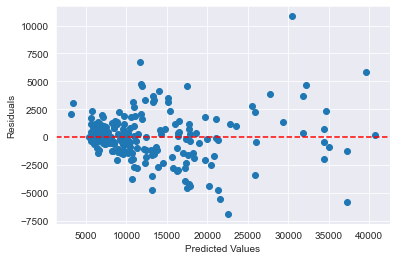

In [218]:
residuals = model5.resid
predicted_values = model5.predict(X)


plt.scatter(predicted_values, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="red", linestyle="--")
plt.show()

### QQ Residual Plots

c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


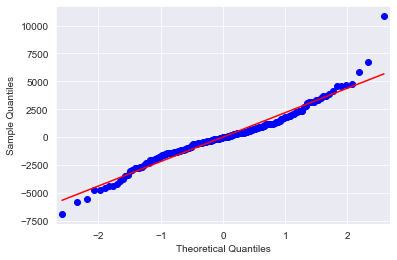

In [220]:
fig, ax = plt.subplots()
sm2.graphics.qqplot(residuals, line='s', ax=ax)
plt.show()